# 🎵 Billboard Song Lyrics NLP Analysis
This notebook analyzes Billboard Top 100 song lyrics from 2012 to 2022 using Natural Language Processing techniques. The goals are to:
- Extract and analyze lyrics using TF and TF-IDF
- Perform feature analysis and clustering
- Conduct sentiment analysis on song lyrics

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity
from textblob import TextBlob
import warnings
warnings.filterwarnings('ignore')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
df = pd.read_csv("billboard_2012_to_2022_top_100_song_lyrics.csv")
df = df[df['Lyrics'].notnull()].copy()
df.reset_index(drop=True, inplace=True)
df.head()

,Top100Year,SongTitle,Artist,LyricsStatus,Lyrics,ReleaseYear,Genre
0,2012,Call Me Maybe,Carly Rae Jepsen,True,"I threw a wish in the well\nDon't ask me, I'll...",2012,"R&B/Soul, Pop"
1,2012,Payphone,Maroon 5 Featuring Wiz Khalifa,True,I'm at a payphone trying to call home\nAll of ...,2012,"R&B/Soul, Pop"
2,2012,Somebody That I Used To Know,Gotye Featuring Kimbra,True,Now and then I think of when we were together\...,2011,"R&B/Soul, Pop"
3,2012,Wide Awake,Katy Perry,True,I'm wide awake\nI'm wide awake\nI'm wide awake...,2012,"R&B/Soul, Pop, UK R&B"
4,2012,Where Have You Been,Rihanna,True,"I've been everywhere, man\nLooking for someone...",2011,"Dance-pop, R&B/Soul, Electro house, Pop, UK R&B"


## Text Preprocessing

In [ ]:
stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r"[^a-z\s]", "", text)
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return " ".join(tokens)

df["processed_lyrics"] = df["Lyrics"].apply(preprocess_text)
df[["SongTitle", "processed_lyrics"]].head()

,SongTitle,processed_lyrics
0,Call Me Maybe,threw wish well dont ask ill never tell looked...
1,Payphone,im payphone trying call home change spent time...
2,Somebody That I Used To Know,think together like said felt happy could die ...
3,Wide Awake,im wide awake im wide awake im wide awake yeah...
4,Where Have You Been,ive everywhere man looking someone someone ple...


## Term Frequency and Inverse Document Frequency (TF-IDF)

In [ ]:
vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(df["processed_lyrics"])
tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=vectorizer.get_feature_names_out())
tfidf_df.head()

,aa,aaaaah,aaah,aachoo,aaliyah,aall,aap,ab,abajo,abandoned,...,zooties,zoov,zoovie,zoowap,zorro,zr,zucchini,zumb,zumba,zzzzzzz
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Feature Extraction and WordCloud Analysis

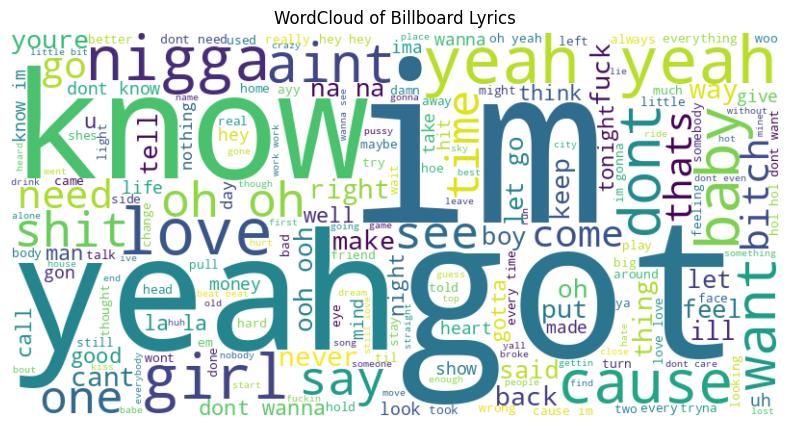

In [ ]:
text = " ".join(df["processed_lyrics"])
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("WordCloud of Billboard Lyrics")
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=5, random_state=42)
df["Cluster"] = kmeans.fit_predict(X_tfidf)
df[["SongTitle", "Artist", "Cluster"]].head()

,SongTitle,Artist,Cluster
0,Call Me Maybe,Carly Rae Jepsen,2
1,Payphone,Maroon 5 Featuring Wiz Khalifa,2
2,Somebody That I Used To Know,Gotye Featuring Kimbra,2
3,Wide Awake,Katy Perry,3
4,Where Have You Been,Rihanna,1


## NLP Sentiment Analysis

In [ ]:
df["Sentiment"] = df["Lyrics"].apply(lambda x: TextBlob(x).sentiment.polarity)
df["Sentiment_Label"] = df["Sentiment"].apply(lambda x: "Positive" if x > 0 else "Negative" if x < 0 else "Neutral")
df[["SongTitle", "Artist", "Sentiment", "Sentiment_Label"]].head()

,SongTitle,Artist,Sentiment,Sentiment_Label
0,Call Me Maybe,Carly Rae Jepsen,-0.392208,Negative
1,Payphone,Maroon 5 Featuring Wiz Khalifa,-0.011682,Negative
2,Somebody That I Used To Know,Gotye Featuring Kimbra,0.222424,Positive
3,Wide Awake,Katy Perry,-0.020068,Negative
4,Where Have You Been,Rihanna,0.225000,Positive


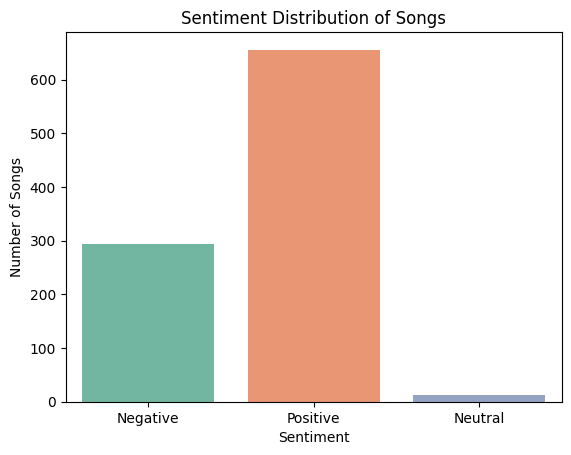

In [ ]:
sns.countplot(data=df, x="Sentiment_Label", palette="Set2")
plt.title("Sentiment Distribution of Songs")
plt.xlabel("Sentiment")
plt.ylabel("Number of Songs")
plt.show()

## Sentiment Trends Over Time (2012–2022)
      Exploring how the average sentiment of Billboard song lyrics evolved over the last decade.


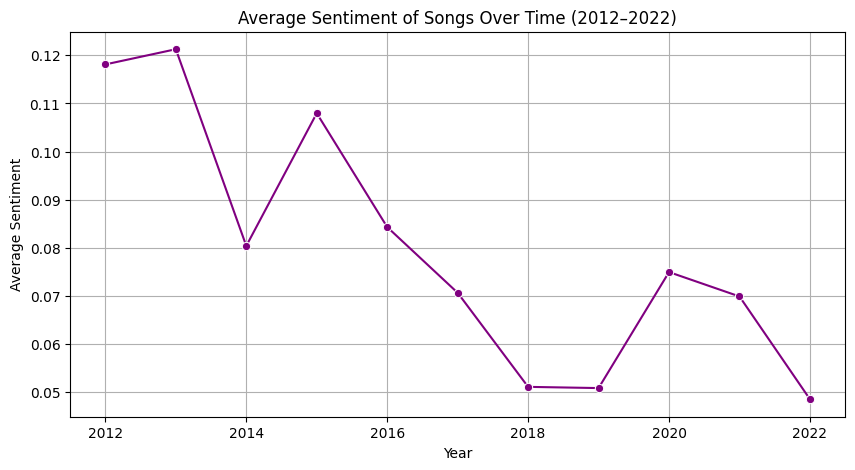

In [13]:
df['Top100Year'] = pd.to_numeric(df['Top100Year'], errors='coerce')
yearly_sentiment = df.groupby('Top100Year')['Sentiment'].mean().dropna()

plt.figure(figsize=(10, 5))
sns.lineplot(x=yearly_sentiment.index, y=yearly_sentiment.values, marker='o', color='purple')
plt.title("Average Sentiment of Songs Over Time (2012–2022)")
plt.xlabel("Year")
plt.ylabel("Average Sentiment")
plt.grid(True)
plt.show()

## Conclusion
- TF-IDF helped quantify lyrical content for each song.
- WordClouds showed common themes in lyrics.
- KMeans clustered songs with similar content.
- Sentiment analysis revealed the emotional tone of the songs.

